In [31]:
import pickle
from entities.games import GameShow
from collections import defaultdict
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

dark_pink = '#ed1b76'
pink = '#f44786'
blue = 	'#249f9c'
dark_blue = '#037a76'
sand = '#ffdb94'

In [32]:
with open('simulation.pkl', 'rb') as f:
    game_shows = pickle.load(f)

In [33]:
game_shows[-1]

GameShow
self.num_players=456, 
self.num_active=13, 
self.num_eliminated=443, 
self.survival_ratio=0.03
self.prize_pool=29,144,737€
self.prize_per_player=2,241,903€

In [4]:
game_names = []
for i, g in enumerate(game_shows[-1].games_played, start=1):
    print(f'Game {i}) {g}')
    game_names.append(type(g).__name__)

Game 1) RedLightGreenLight: self.num_players=456, self.num_active=292, self.num_eliminated=164, self.survival_ratio=0.64
Game 2) SugarHoneycombs: self.num_players=292, self.num_active=141, self.num_eliminated=151, self.survival_ratio=0.48
Game 3) TugOfWar: self.num_players=141, self.num_active=68, self.num_eliminated=73, self.survival_ratio=0.48
Game 4) Marbles: self.num_players=68, self.num_active=34, self.num_eliminated=34, self.survival_ratio=0.50
Game 5) GlassStones: self.num_players=34, self.num_active=25, self.num_eliminated=9, self.survival_ratio=0.74
Game 6) SquidGame: self.num_players=25, self.num_active=12, self.num_eliminated=13, self.survival_ratio=0.48


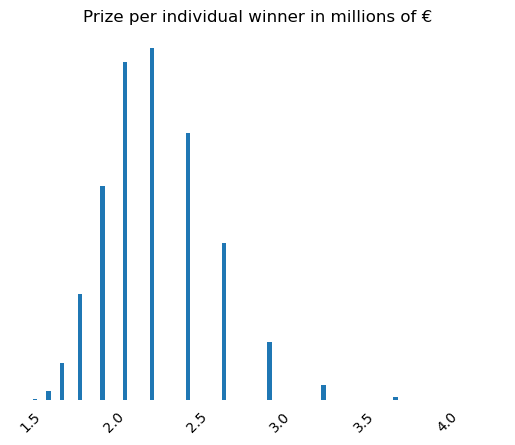

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist([game_show.prize_per_player / 1_000_000 for game_show in game_shows], bins=100, density=True)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.set_title('Prize per individual winner in millions of €')
ax.axes.get_yaxis().set_visible(False)
plt.box(False)
plt.show()

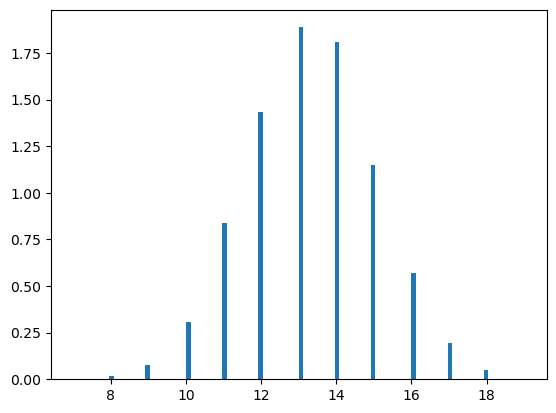

In [6]:
plt.hist([game_show.num_active for game_show in game_shows], bins=100, density=True)
plt.show()

## Red Light Green Light

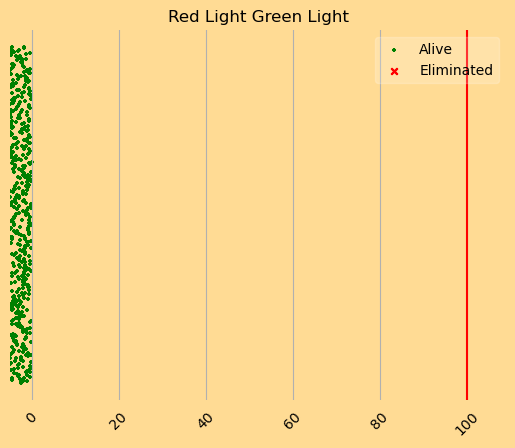

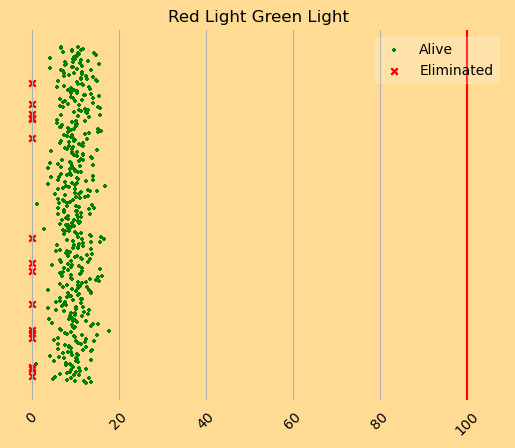

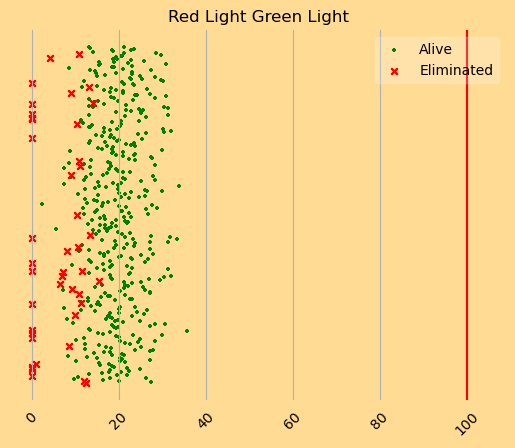

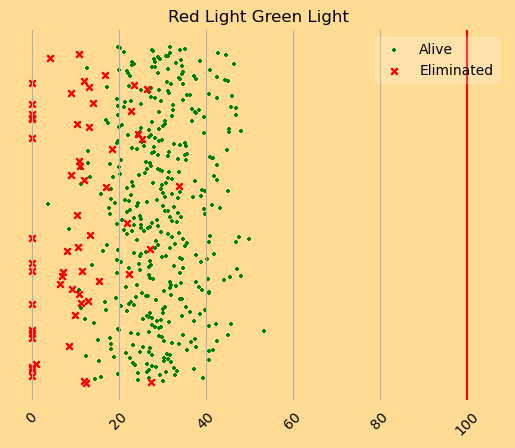

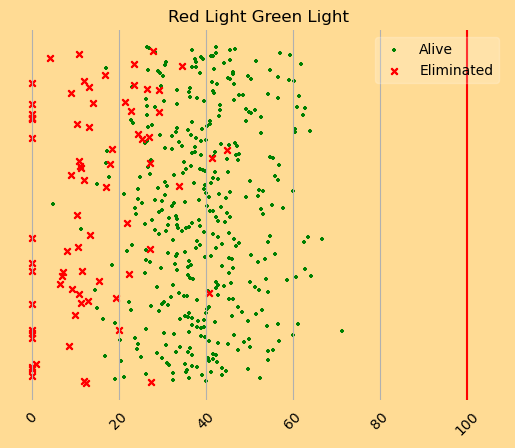

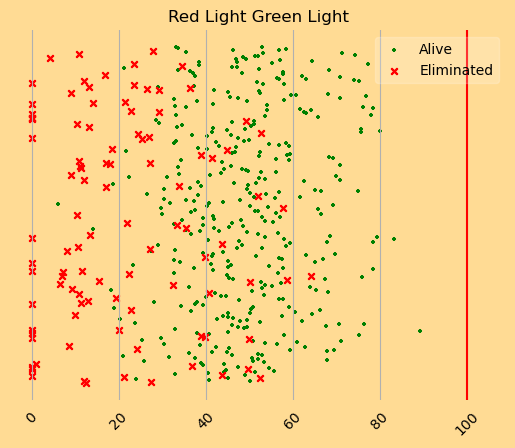

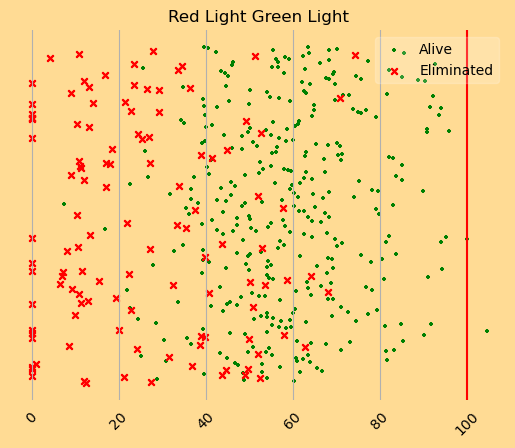

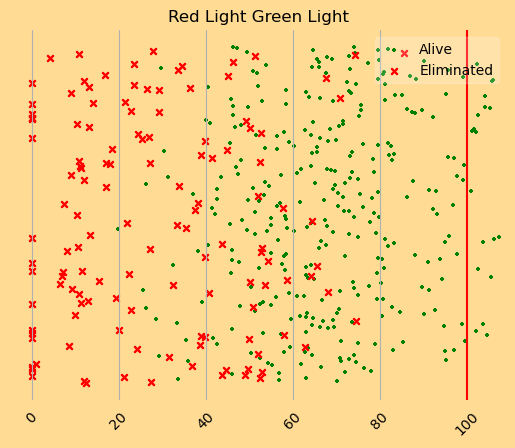

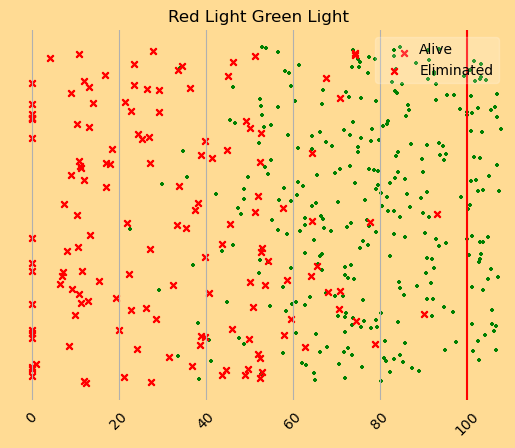

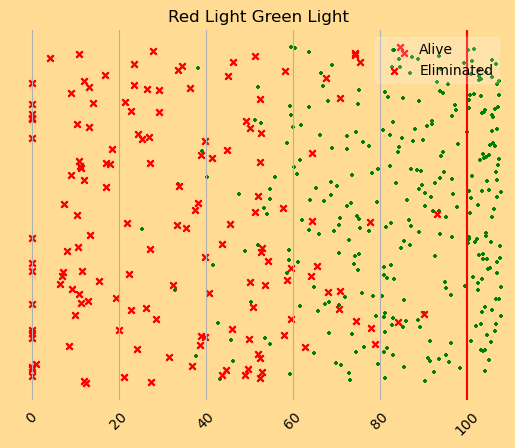

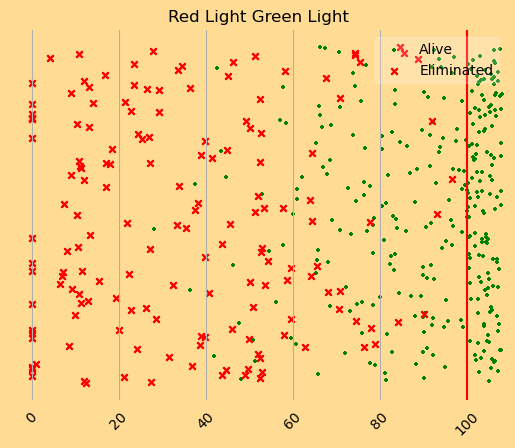

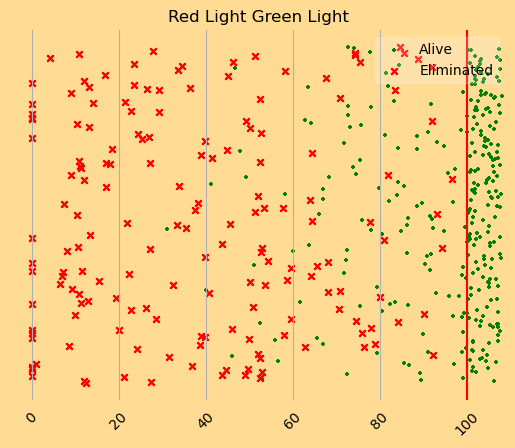

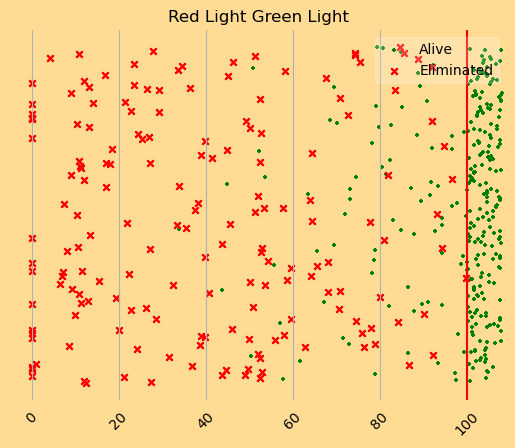

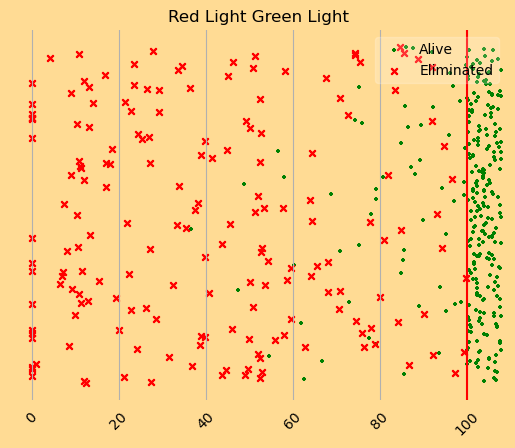

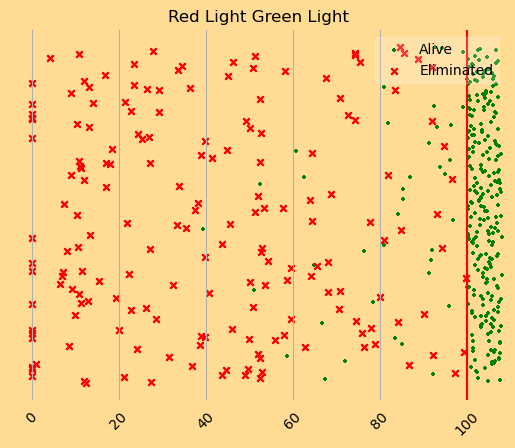

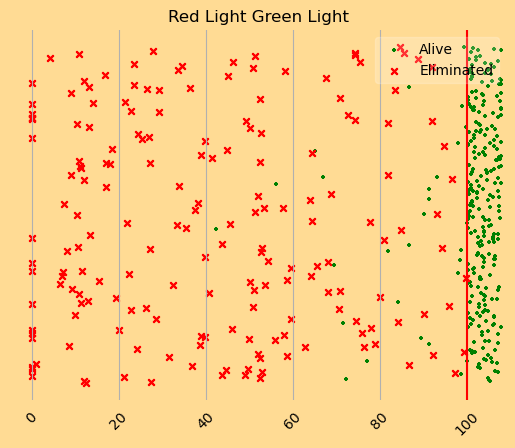

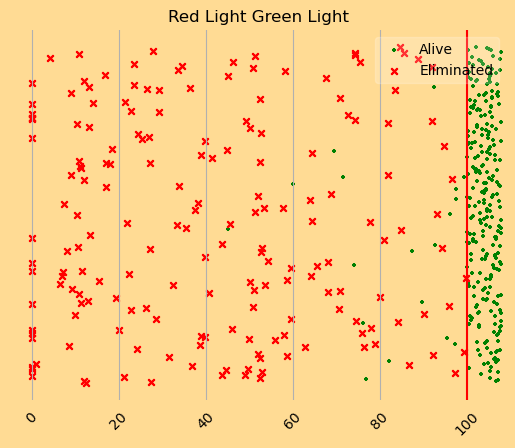

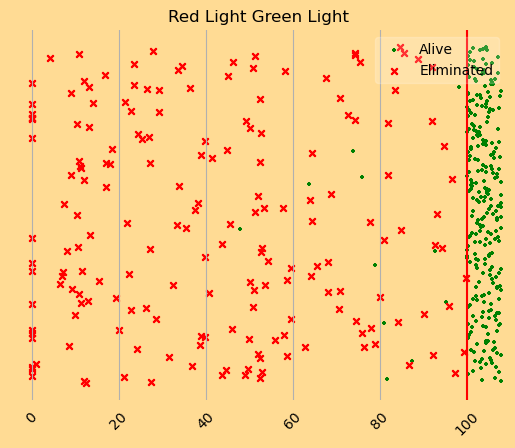

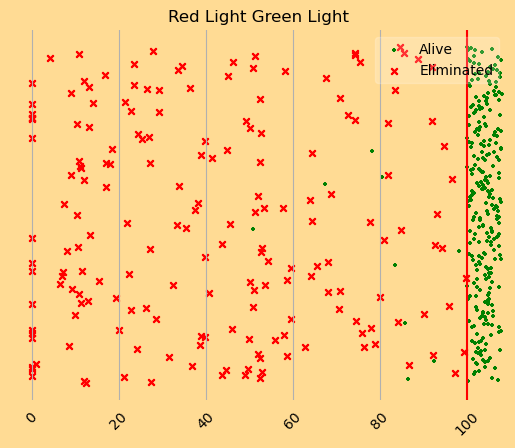

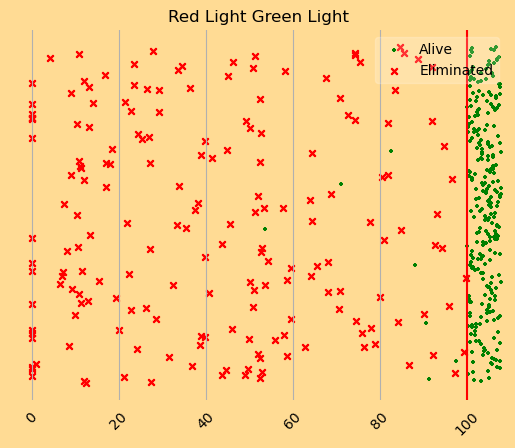

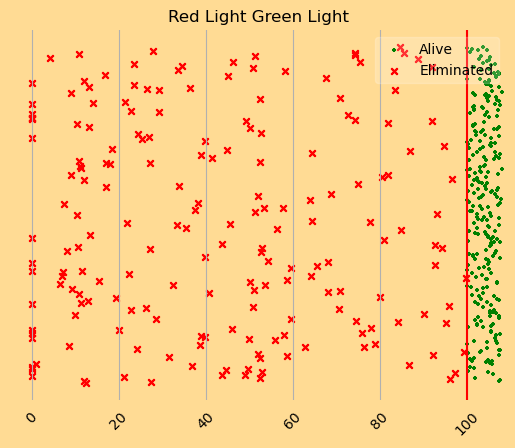

In [66]:
rlgl_hist = game_shows[-1].games_played[0].state_hist
filenames = []
for step, rlgl in enumerate(rlgl_hist):
    x_coords_alive = []
    y_coords_alive = []
    
    x_coords_dead = []
    y_coords_dead = []
    for player, player_x in rlgl['distances'].items():
        player_y = player.id
    
        if player in rlgl['active']:
            x_coords_alive.append(player_x)
            y_coords_alive.append(player_y)
        else:
            x_coords_dead.append(player_x)
            y_coords_dead.append(player_y)
    
    x_coords_alive = np.array(x_coords_alive)
    n_finished = len(x_coords_alive[x_coords_alive == 100])
    mask_100 = x_coords_alive == 100
    x_coords_alive = x_coords_alive.astype(float)
    x_coords_alive[mask_100] += np.random.uniform(0, 8, size=np.sum(mask_100))

    mask_0 = x_coords_alive == 0
    x_coords_alive = x_coords_alive.astype(float)
    x_coords_alive[mask_0] -= np.random.uniform(0, 5, size=np.sum(mask_0))
    
    fig, ax = plt.subplots(1, 1)
    fig.set_facecolor(sand)
    ax.scatter(x_coords_alive, y_coords_alive, c='g', s=10, marker='+', label='Alive')
    ax.scatter(x_coords_dead, y_coords_dead, c='r', s=20, marker='$\\times$', label='Eliminated')
    ax.set_xlim([-5, 109])
    ax.legend(loc='upper right', edgecolor='1', framealpha=0.2)
    ax.tick_params(axis='x', labelrotation=45)
    ax.xaxis.set_ticks_position('none')
    ax.grid(axis='x')
    ax.axvline(x=100, color='r')
    
    ax.set_title('Red Light Green Light')
    ax.axes.get_yaxis().set_visible(False)
    plt.box(False)
    fn = f'img/rlgl/rlgl_{step}.png'
    plt.savefig(fn)
    filenames.append(fn)
    plt.show()


In [75]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('img/rlgl.gif', images, fps=2)

In [74]:
imageio.help('gif')

GIF-PIL - Compuserve GIF via Pillow

    See :mod:`imageio.plugins.pillow_legacy`



* Animation of RLGL
* Animation of Glass Stones
* Statistics per Game:
  * vertical with confidence bands
* Odds of survival

In [8]:
alive_per_sim = np.array([[g.num_active for g in gs.games_played] for gs in game_shows])[:300,:].T
alive_per_sim = np.insert(alive_per_sim, 0, 456, axis=0)

In [9]:
alive_per_sim_avg = np.mean(alive_per_sim, axis=1)

C:\Users\dylan\AppData\Local\Temp\ipykernel_47528\1900726972.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([None, 'Initial'] + game_names)


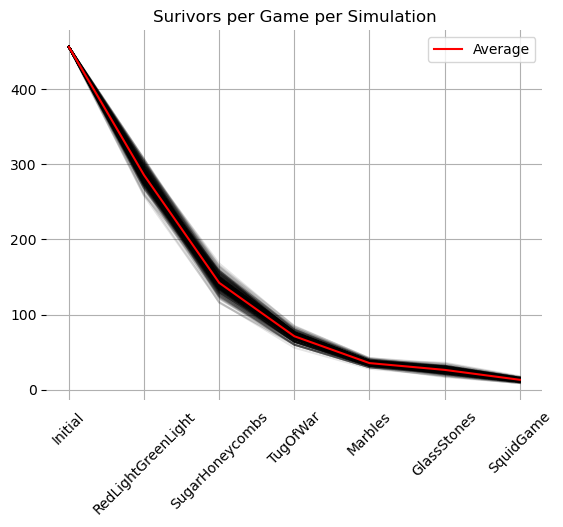

In [10]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.plot(alive_per_sim, alpha=0.05, color='dark_blue')
ax.plot(alive_per_sim_avg, color='pink', label='Average')
ax.set_xticklabels([None, 'Initial'] + game_names)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.grid(axis='y')
ax.grid(axis='x')
ax.set_title('Surivors at the end of each game')
plt.box(False)
plt.legend()
plt.show()

In [11]:
surival_rate_per_game = defaultdict(list)
for gs in game_shows:
    for i, game in enumerate(gs.games_played):
        surival_rate_per_game[type(game).__name__].append(game.survival_ratio)

In [12]:
conf_per_game = {}
for game_name, ratios in surival_rate_per_game.items():
    conf_per_game[game_name] = {
        'mean': np.mean(ratios),
        'std': np.std(ratios),
    }

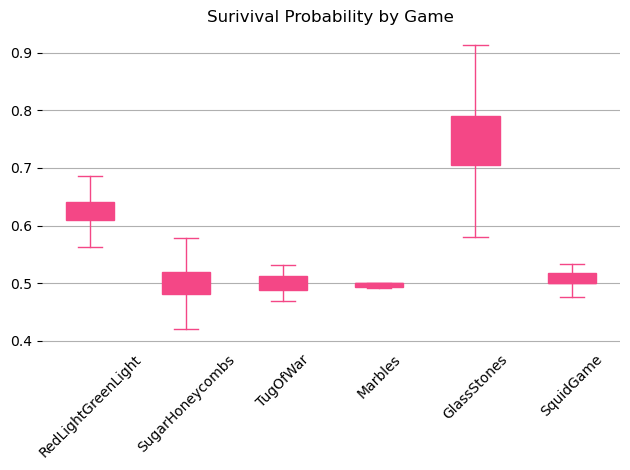

In [79]:
fig, ax = plt.subplots(tight_layout=True)

ax.boxplot(
    [v for v in surival_rate_per_game.values()], 
    tick_labels=game_names,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=pink, color=pink),
    capprops=dict(color=pink),
    whiskerprops=dict(color=pink),
    flierprops=dict(color=pink, markeredgecolor=pink),
    medianprops=dict(color=pink),
)

plt.box(False)
ax.grid(axis='y')
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('none')
ax.set_title('Surivival Probability by Game')
plt.savefig('boxplot_game_survival_rate.png')

plt.show()